          Country  Human Development Index  Mean Mathematics Performance Score
0          Norway                     94.9                                 502
1       Australia                     93.9                                 494
2     New Zealand                     91.5                                 495
3   United States                     92.0                                 470
4         Ireland                     92.3                                 504
5         Iceland                     92.1                                 488
6     Netherlands                     92.4                                 512
7          Canada                     92.0                                 516
8         Germany                     92.6                                 506
9       Singapore                     92.5                                 564
10      Argentina                     82.7                                 409
11         Brazil                     75.4          

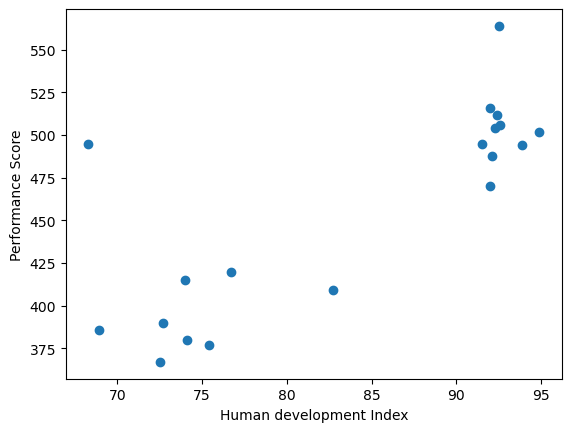

In [48]:
import numpy as np
import pandas as pd
import sklearn


data=pd.read_csv('HDI.csv')
print(data)

x=data["Human Development Index"]
y=data["Mean Mathematics Performance Score"]

import matplotlib.pyplot as plt 
plt.scatter(x,y)
plt.xlabel("Human development Index")
plt.ylabel("Performance Score")
plt.show()

In [49]:
import scipy.stats as statsmodule
result=statsmmodule.linregress(x,y)
result

LinregressResult(slope=4.757614700316079, intercept=58.85558970773474, rvalue=0.7922409855274186, pvalue=5.270846568744181e-05, stderr=0.8887623344286066, intercept_stderr=74.94996580217531)

In [50]:
import statsmodels.api as sm

#add a constant term to the predictor variable 
X_with_constant=sm.add_constant(x)

#fit the linear regression model
model=sm.OLS(y,X_with_constant).fit()

#print the summary of the regression
print(model.summary())


                                    OLS Regression Results                                    
Dep. Variable:     Mean Mathematics Performance Score   R-squared:                       0.628
Model:                                            OLS   Adj. R-squared:                  0.606
Method:                                 Least Squares   F-statistic:                     28.66
Date:                                Thu, 15 May 2025   Prob (F-statistic):           5.27e-05
Time:                                        15:01:02   Log-Likelihood:                -94.937
No. Observations:                                  19   AIC:                             193.9
Df Residuals:                                      17   BIC:                             195.8
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                              coef    std err     

c:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


creating a simple Regression Equation

In [51]:
#import the text file with data from the local machine 
#this is a text file without any headers and hence the headers
#are assigned in the following line 
df=pd.read_csv("cust1.csv")
print(df)

    Sales_Effort  Product_Sales
0            100             10
1             82              8
2             71              7
3            111             11
4            112             11
5             61              6
6             62              6
7            113             11
8            101             10
9             99             10
10            79              8
11            81              8
12            51              5
13            50              5
14            49              5
15            30              3
16            31              3
17            29              3
18            20              2
19            41              4
20            39              4


In [52]:
#separating the response variable data to a separate dataframe
y=df["Product_Sales"]
#displaying top 5 values from this dataframe
y.head(5)



0    10
1     8
2     7
3    11
4    11
Name: Product_Sales, dtype: int64

In [53]:
#other than the product_sales other data is carried over to a separate dataframe
x=df.drop(["Product_Sales"],axis=1)
#print out the data types
print(x.dtypes)
#displaying top 5 values from this dataframe
x.head(5)

Sales_Effort    int64
dtype: object


,Sales_Effort
0,100
1,82
2,71
3,111
4,112


In [54]:
#the data is split as training set =15 and test=6
#ther are multiple means-here we are doint it manually
train_samples=(15)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=train_samples,test_size=6)


In [55]:
#import necessary packages
from sklearn.linear_model import LinearRegression

#running the LinearRegression
Line_Reg=LinearRegression()
Line_Reg.fit(X_train,y_train)
#line_Reg is the model generated

LinearRegression()

In [56]:
#print regression in coefficientes (b_1 and b_0)
print(Line_Reg.coef_,Line_Reg.intercept_)

[0.09889525] -0.017915876639709616


In [57]:
#print the regression score using the test data 
#this provides the regression model accuracy
Line_Reg.score(X_test,y_test)

0.9973228587645578

In [58]:
#the above shows every less overall error in the prediction
#run the model on the test data to arrive at the predicted values
predicted=Line_Reg.predict(X_test)
#printing the predicted and actual response values 
print(predicted)
print(y_test)

[10.95945711  3.83899896  7.99259954  7.79480904  4.82795148  2.85004643]
3     11
20     4
11     8
10     8
14     5
17     3
Name: Product_Sales, dtype: int64


In [59]:
#as you can see above there is high agreement between the 
#predicted and actual values

#we will use the entire data set to carry out the 
#prediction using the regression model generated
predicted_full=Line_Reg.predict(x)
print(predicted_full)
print(y)

[ 9.87160933  8.0914948   7.00364702 10.95945711 11.05835236  6.0146945
  6.11358975 11.15724761  9.97050459  9.77271408  7.79480904  7.99259954
  5.02574198  4.92684673  4.82795148  2.94894169  3.04783694  2.85004643
  1.95998917  4.03678946  3.83899896]
0     10
1      8
2      7
3     11
4     11
5      6
6      6
7     11
8     10
9     10
10     8
11     8
12     5
13     5
14     5
15     3
16     3
17     3
18     2
19     4
20     4
Name: Product_Sales, dtype: int64


Testing the assumptions of regression

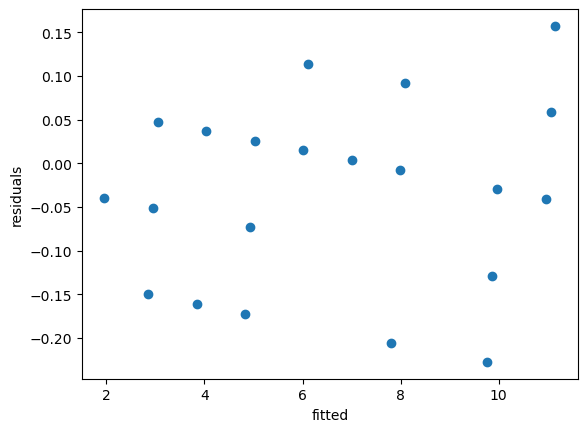

In [60]:
plt.scatter(predicted_full,(predicted_full-y))
plt.xlabel("fitted")
plt.ylabel("residuals")
plt.show()

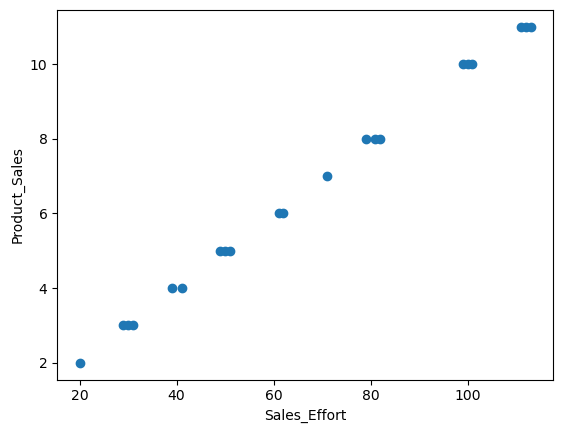

In [61]:
#creating the scatter plot between response variable
#actual values and independent variable actual values
plt.scatter(df.Sales_Effort,df.Product_Sales)
plt.xlabel("Sales_Effort")
plt.ylabel("Product_Sales")
plt.draw()
plt.show()